In [1]:
import numpy as np
import scipy
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

## Timbre <b>
    Quality of sound that distinguishes the tone of different instruments and voices, even if they have the same pitch and loudness

In [2]:
x, sr = librosa.load('audio/clarinet-c6.wav', sr=48000)
ipd.Audio(x, rate=sr)

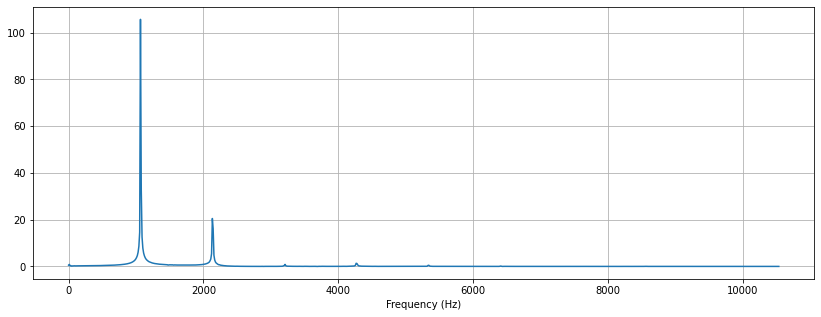

In [3]:
X = scipy.fft.fft(x[10000:14096])
f = np.linspace(0, sr, len(x[10000:14096]))
X_mag = np.absolute(X)
plt.figure(figsize=(14, 5))
plt.plot(f[:900], X_mag[:900]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()

In [4]:
x, sr = librosa.load('audio/oboe-c6.wav')
ipd.Audio(x, rate=sr)

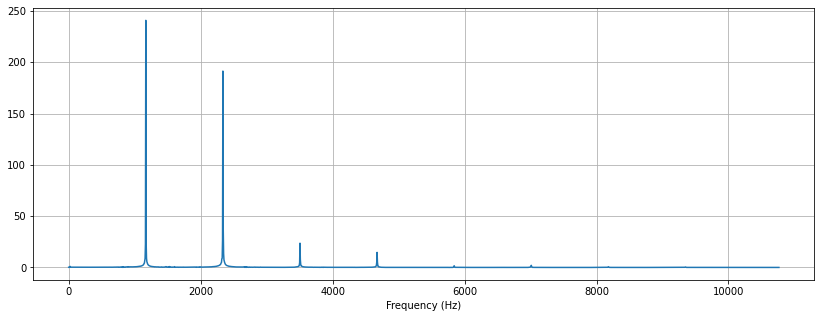

In [5]:
X = scipy.fft.fft(x[10000:14096])
f = np.linspace(0, sr, len(x[10000:14096]))
X_mag = np.absolute(X)
plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()

Both signals have approximately the same pitch and fundamental frequency, yet their timbres differ

## Acoustic measures and quantities

### RMS (Root Mean Square)

In [6]:
frame_size = 1024
hop = 512

In [7]:
oboe_rms = librosa.feature.rms(y=x, frame_length=frame_size, hop_length=hop)[0]

In [8]:
frames = range(len(oboe_rms))
t = librosa.frames_to_time(frames, hop_length=hop)

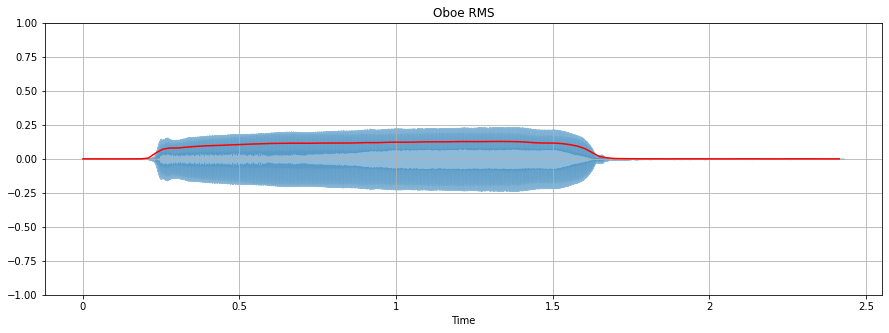

In [9]:
# rms energy is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(x, alpha=0.5)
plt.plot(t, oboe_rms, color="r")
plt.ylim((-1, 1))
plt.title("Oboe RMS")
plt.grid()

In [10]:
def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

In [11]:
ae_oboe = amplitude_envelope(x, frame_size, hop)

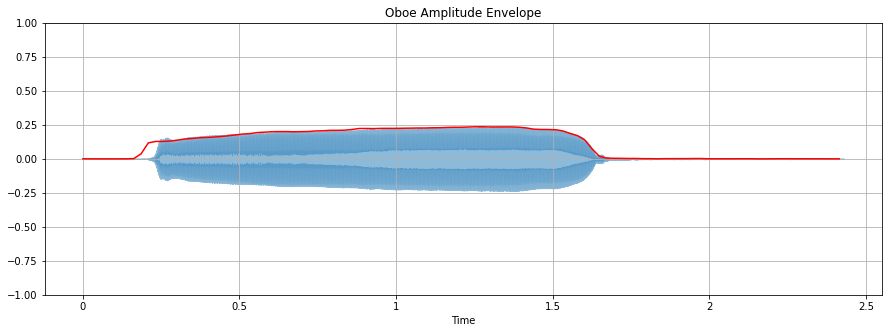

In [12]:
frames = range(len(ae_oboe))
t = librosa.frames_to_time(frames, hop_length=hop)
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(x, alpha=0.5)
plt.plot(t, ae_oboe, color="r")
plt.ylim((-1, 1))
plt.title("Oboe Amplitude Envelope")
plt.grid()

## ECHO

In [13]:
x, sr = librosa.load('audio/oh-yeah-everything-is-fine.wav', sr=48000)
print(x.shape)
ipd.Audio(x, rate=sr)

(84885,)


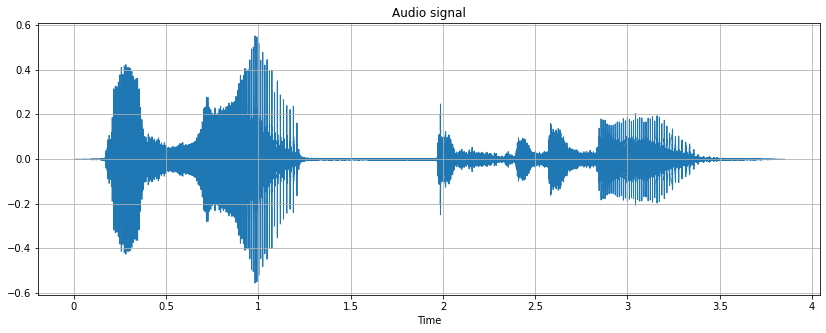

In [14]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x)
plt.title("Audio signal")
plt.grid()

We define our impulse response, which contains all the echoes. Each impulse represents a different echo.
The *index* represents the lag and the *value* represents its amplitude.

In [15]:
T = 0.5 # seconds
nsamples = int(T*sr)
impulse_response = np.zeros(nsamples)#32000
impulse_response[20] = 0.5
impulse_response[14000] = 0.1

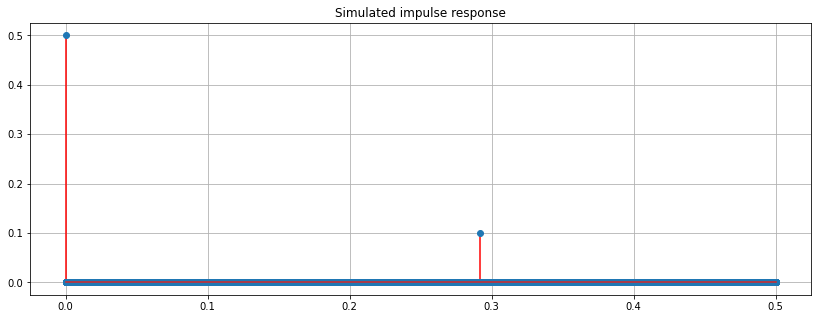

In [16]:
plt.figure(figsize=(14, 5))
plt.stem(np.linspace(0, T, int(T*sr)),impulse_response, linefmt='r')
plt.title("Simulated impulse response")
plt.grid()

In [17]:
echo_audio = np.convolve(x, impulse_response)
print(echo_audio.shape)
ipd.Audio(echo_audio, rate=sr)

(108884,)


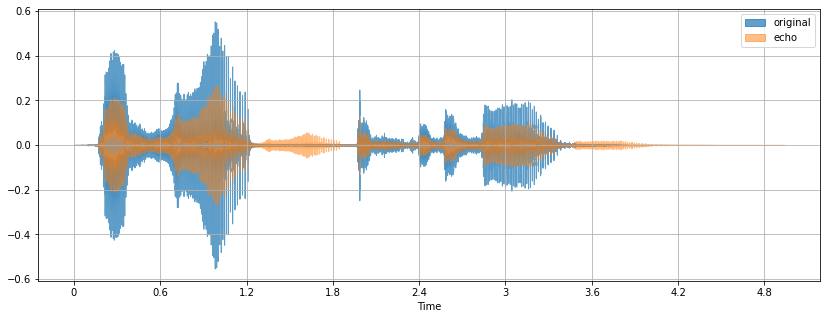

In [117]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, alpha=0.7, label='original')
librosa.display.waveshow(echo_audio, alpha=0.5, label='echo')
plt.legend()
plt.grid()